In [1]:
import pandas as pd
import numpy as np

In [14]:
df1=pd.read_csv('atp_rankings.csv',date_format='%Y%m%d',parse_dates=['ranking_date'])
df2=pd.read_csv('atp_players.csv',date_format='%Y%m%d',parse_dates=['dob'])

In [15]:
df=df1.merge(df2,left_on='player', right_on='player_id')

In [74]:
t.sort_values(['ranking_date','rank'])

,ranking_date,rank,player,points,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id,name_invalid,name_full,year_invalid,month_invalid,day_invalid
1836589,1973-08-27,1,100119,NaN,100119,Ilie,Nastase,R,1946-07-19,ROU,183.0,Q106113,False,Ilie Nastase,False,False,False
1836626,1973-08-27,2,100174,NaN,100174,Manuel,Orantes,L,1949-02-06,ESP,178.0,Q318569,False,Manuel Orantes,False,False,False
1836594,1973-08-27,3,100126,NaN,100126,Stan,Smith,R,1946-12-14,USA,193.0,Q54657,False,Stan Smith,False,False,False
1836562,1973-08-27,4,100074,NaN,100074,Arthur,Ashe,R,1943-07-10,USA,185.0,Q53325,False,Arthur Ashe,False,False,False
1836532,1973-08-27,5,100029,NaN,100029,Rod,Laver,L,1938-08-09,AUS,173.0,Q105550,False,Rod Laver,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3233648,2024-05-27,96,200443,635.0,200443,Adam,Walton,U,1999-04-17,AUS,NaN,NaN,False,Adam Walton,False,False,False
3233649,2024-05-27,97,126610,630.0,126610,Matteo,Berrettini,R,1996-04-12,ITA,196.0,Q29918446,False,Matteo Berrettini,False,False,False
3233650,2024-05-27,98,104527,628.0,104527,Stan,Wawrinka,R,1985-03-28,SUI,183.0,Q193661,False,Stan Wawrinka,False,False,False
3233651,2024-05-27,99,207681,626.0,207681,Francisco,Comesana,R,2000-10-06,ARG,NaN,NaN,False,Francisco Comesana,False,False,False


In [56]:
t=df.loc[df['rank']<101,:]
t=t.loc[(~df.year_invalid)&(~df.month_invalid)&(~df.day_invalid),] 

In [57]:
t['ranking_date']=pd.to_datetime(t.ranking_date, format = '%Y/%m/%d')
t['dob']=pd.to_datetime(t.dob, format = '%Y/%m/%d')

In [59]:
dt=(t['ranking_date']-t['dob']).dt.days/365

In [62]:
p=pd.DataFrame(data={'age':dt, 'date': t.ranking_date})

<Axes: xlabel='date'>

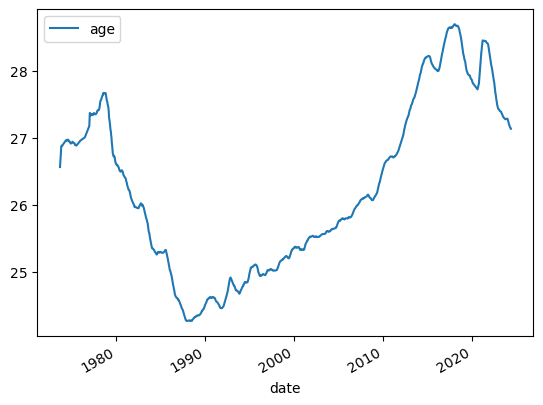

In [81]:
p.groupby('date').mean().rolling('365D').mean().plot()